The Task

Dates - timestamp of the crime incident

DayOfWeek - the day of the week

PdDistrict - name of the Police Department District

Resolution - how the crime incident was resolved (only in train.csv)

Address - the approximate street address of the crime incident

X - Longitude

Y - Latitude

Target

Category - category of the crime incident (only in train.csv). This is the target variable you are going to predict.

Descript - detailed description of the crime incident (only in train.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

path = 'drive/MyDrive/'
train = pd.read_csv(path + 'Group/crime/train.csv', index_col=0)
test = pd.read_csv(path + 'Group/crime/test.csv', index_col=0)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train.reset_index(inplace= True )

In [4]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


Пропущенные значения

In [5]:
print (train.isnull().sum())
print (test.isnull().sum())

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64
Dates         0
DayOfWeek     0
PdDistrict    0
Address       0
X             0
Y             0
dtype: int64


In [6]:
train.duplicated().sum()

2323

In [7]:
train.drop_duplicates(keep="first", inplace=True)

Типы данных

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 875726 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       875726 non-null  object 
 1   Category    875726 non-null  object 
 2   Descript    875726 non-null  object 
 3   DayOfWeek   875726 non-null  object 
 4   PdDistrict  875726 non-null  object 
 5   Resolution  875726 non-null  object 
 6   Address     875726 non-null  object 
 7   X           875726 non-null  float64
 8   Y           875726 non-null  float64
dtypes: float64(2), object(7)
memory usage: 66.8+ MB


**Выбор характеристик и разработка:**

*   Выявление закономерностей
*   Удаление неиспользуемых столбцов
*   Из поля «Даты» мы извлекли день, месяц, год, час, минуту, день недели и количество дней с первого дня в данных.
*   Из поля «Адрес» мы узнали, произошло ли происшествие на перекрестке или в здании.


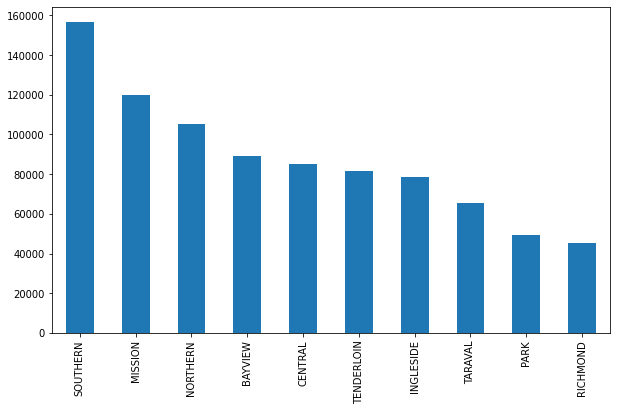

In [9]:
train['PdDistrict'].value_counts().plot(kind='bar', figsize=(10,6))

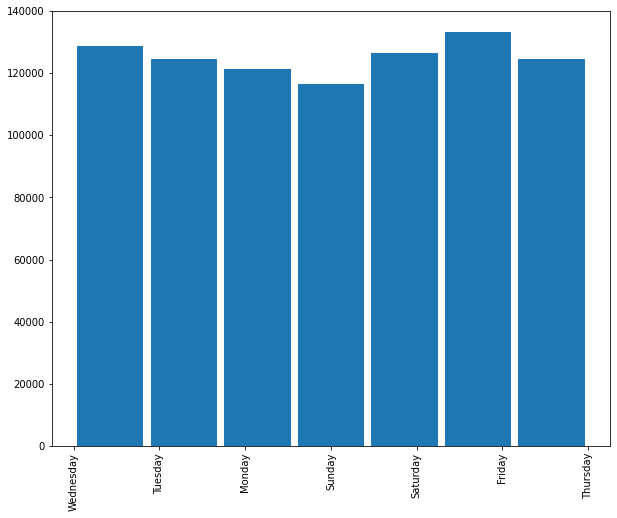

In [10]:
plt.hist(train['DayOfWeek'],bins=7, rwidth=0.9)

plt.xticks(rotation = 90)
fig = plt.gcf() 
fig.set_size_inches(10,8)

fig.show()

In [11]:
pd.crosstab(train['Category'], train['Resolution'])

Resolution,"ARREST, BOOKED","ARREST, CITED",CLEARED-CONTACT JUVENILE FOR MORE INFO,COMPLAINANT REFUSES TO PROSECUTE,DISTRICT ATTORNEY REFUSES TO PROSECUTE,EXCEPTIONAL CLEARANCE,JUVENILE ADMONISHED,JUVENILE BOOKED,JUVENILE CITED,JUVENILE DIVERTED,LOCATED,NONE,NOT PROSECUTED,PROSECUTED BY OUTSIDE AGENCY,PROSECUTED FOR LESSER OFFENSE,PSYCHOPATHIC CASE,UNFOUNDED
Category,,,,,,,,,,,,,,,,,
ARSON,203,7,1,2,0,0,3,17,6,2,0,1247,1,1,0,11,11
ASSAULT,23432,3545,40,1017,1308,320,328,815,293,11,40,44688,94,68,9,214,593
BAD CHECKS,25,1,0,2,6,2,0,1,0,0,0,321,19,25,0,0,4
BRIBERY,159,2,0,5,6,1,0,6,0,0,0,108,0,0,0,0,2
BURGLARY,4856,83,3,160,206,67,5,131,63,2,5,30707,32,20,0,4,256
DISORDERLY CONDUCT,1504,1334,0,14,3,4,17,15,18,2,4,1362,5,2,1,7,21
DRIVING UNDER THE INFLUENCE,1939,185,0,0,0,1,0,8,1,0,1,129,0,0,0,1,3
DRUG/NARCOTIC,43708,4490,4,21,11,14,41,509,274,6,8,4632,60,12,11,21,97
DRUNKENNESS,3273,216,0,9,3,2,5,19,4,2,2,698,12,1,1,21,9


In [12]:
train = train.drop(["Descript", "Resolution"], axis = 1)

In [13]:
def transformDataset(dataset):
    dataset['Dates'] = pd.to_datetime(dataset['Dates'])
    
    dataset['Date'] = dataset['Dates'].dt.date
    
    dataset['n_days'] = (dataset['Date'] - dataset['Date'].min()).apply(lambda x: x.days)
    
    dataset['Year'] = dataset['Dates'].dt.year
    dataset['DayOfWeek'] = dataset['Dates'].dt.dayofweek # OVERWRITE
    dataset['WeekOfYear'] = dataset['Dates'].dt.weekofyear
    dataset['Month'] = dataset['Dates'].dt.month
    
    dataset['Hour'] = dataset['Dates'].dt.hour
    
    dataset['Block'] = dataset['Address'].str.contains('block', case=False)
    dataset['Block'] = dataset['Block'].map(lambda x: 1 if  x == True else 0)

    
    dataset = dataset.drop('Dates', 1)
    dataset = dataset.drop('Date', 1)
    dataset = dataset.drop('Address', 1)
    
    dataset = pd.get_dummies(data=dataset, columns=[ 'PdDistrict'], drop_first = True)
    return dataset

In [14]:
train = transformDataset(train)

<ipython-input-13-54a498a0d616>:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dataset['WeekOfYear'] = dataset['Dates'].dt.weekofyear
<ipython-input-13-54a498a0d616>:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dataset = dataset.drop('Dates', 1)
<ipython-input-13-54a498a0d616>:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dataset = dataset.drop('Date', 1)
<ipython-input-13-54a498a0d616>:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dataset = dataset.drop('Address', 1)


In [15]:
test  = transformDataset(test)

<ipython-input-13-54a498a0d616>:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dataset['WeekOfYear'] = dataset['Dates'].dt.weekofyear
<ipython-input-13-54a498a0d616>:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dataset = dataset.drop('Dates', 1)
<ipython-input-13-54a498a0d616>:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dataset = dataset.drop('Date', 1)
<ipython-input-13-54a498a0d616>:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dataset = dataset.drop('Address', 1)


In [16]:
train.head()

,Category,DayOfWeek,X,Y,n_days,Year,WeekOfYear,Month,Hour,Block,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,WARRANTS,2,-122.425892,37.774599,4510,2015,20,5,23,0,0,0,0,1,0,0,0,0,0
1,OTHER OFFENSES,2,-122.425892,37.774599,4510,2015,20,5,23,0,0,0,0,1,0,0,0,0,0
2,OTHER OFFENSES,2,-122.424363,37.800414,4510,2015,20,5,23,0,0,0,0,1,0,0,0,0,0
3,LARCENY/THEFT,2,-122.426995,37.800873,4510,2015,20,5,23,1,0,0,0,1,0,0,0,0,0
4,LARCENY/THEFT,2,-122.438738,37.771541,4510,2015,20,5,23,1,0,0,0,0,1,0,0,0,0


<BarContainer object of 39 artists>

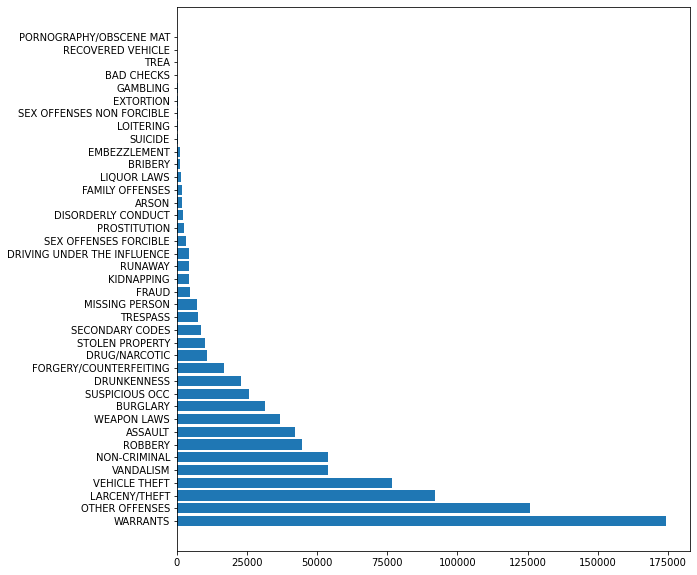

In [17]:
fig, ax = plt.subplots(figsize=(9.2, 10))
plt.barh(train["Category"].unique(),train["Category"].value_counts())

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train["Category"] = le.fit_transform(train["Category"])

In [19]:
X = train.drop("Category",axis=1).values
y = train["Category"].values

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=40,min_samples_split=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=100, n_estimators=40)

In [24]:
from sklearn.metrics import classification_report
rfc_pred = rfc.predict(X_test)
print (classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       137
           1       0.19      0.17      0.18      7619
           2       0.00      0.00      0.00        40
           3       0.00      0.00      0.00        30
           4       0.26      0.04      0.06      3703
           5       0.10      0.01      0.02       414
           6       0.00      0.00      0.00       228
           7       0.35      0.43      0.38      5514
           8       0.00      0.00      0.00       405
           9       0.00      0.00      0.00       104
          10       0.00      0.00      0.00        34
          11       0.00      0.00      0.00        54
          12       0.07      0.00      0.00      1051
          13       0.39      0.01      0.02      1674
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00       250
          16       0.30      0.76      0.43     17247
          17       0.33    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


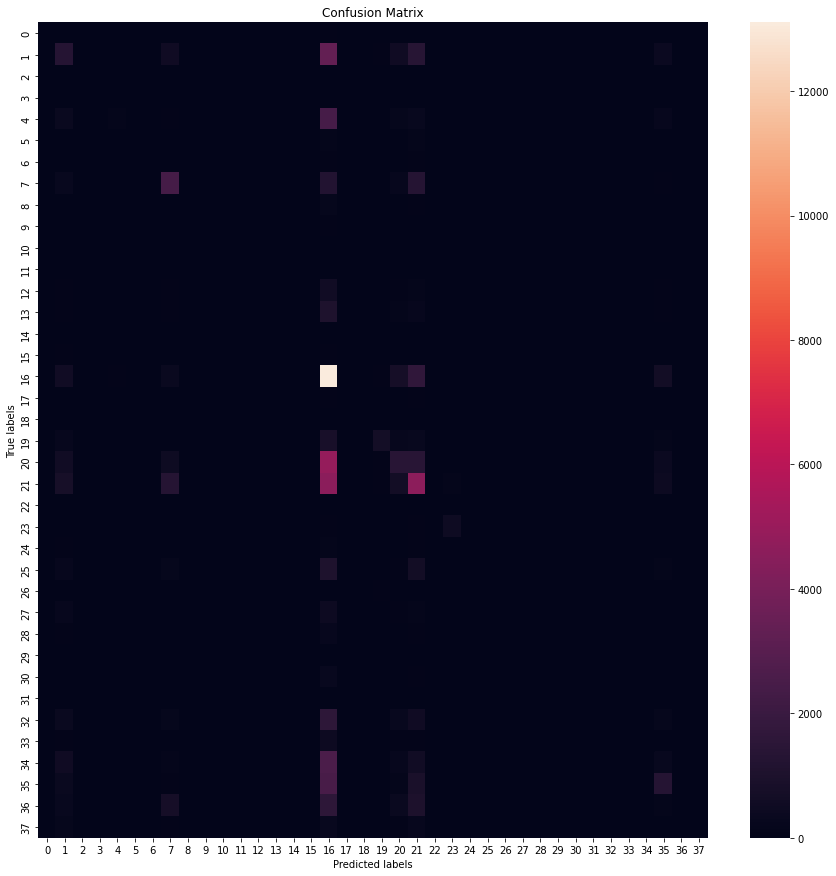

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,rfc_pred)
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(cm, annot=False, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [27]:
from sklearn.linear_model import LogisticRegression

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Сделаем .fit() на обучении
scaler.fit(X_train) # считает среднее по выборке и std 

# .transform() на обучении и тесте (возвращает numpy, поэтому надо самим конвертировать обратно в dataframe с нужными индексами колонками)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [31]:
model_LR = LogisticRegression()

# Обучим его на обучающем датасете
model_LR.fit(X_train, y_train)

# Получим предсказания и посмотрим на долю правильных ответов:
y_pred_test_LR = model_LR.predict(X_test)
y_pred_train_LR = model_LR.predict(X_train)

print(f"Доля верно угаданных объектов {(y_pred_test_LR == y_test).sum() / len(y_test)}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Доля верно угаданных объектов 0.2314183595400409


In [34]:
y_pred_test_LR = model_LR.predict(X_test)
print (classification_report(y_test,y_pred_test_LR))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       137
           1       0.16      0.05      0.08      7619
           2       0.00      0.00      0.00        40
           3       0.00      0.00      0.00        30
           4       0.00      0.00      0.00      3703
           5       0.00      0.00      0.00       414
           6       0.00      0.00      0.00       228
           7       0.24      0.27      0.26      5514
           8       0.00      0.00      0.00       405
           9       0.00      0.00      0.00       104
          10       0.00      0.00      0.00        34
          11       0.00      0.00      0.00        54
          12       0.00      0.00      0.00      1051
          13       0.00      0.00      0.00      1674
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00       250
          16       0.24      0.77      0.36     17247
          17       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


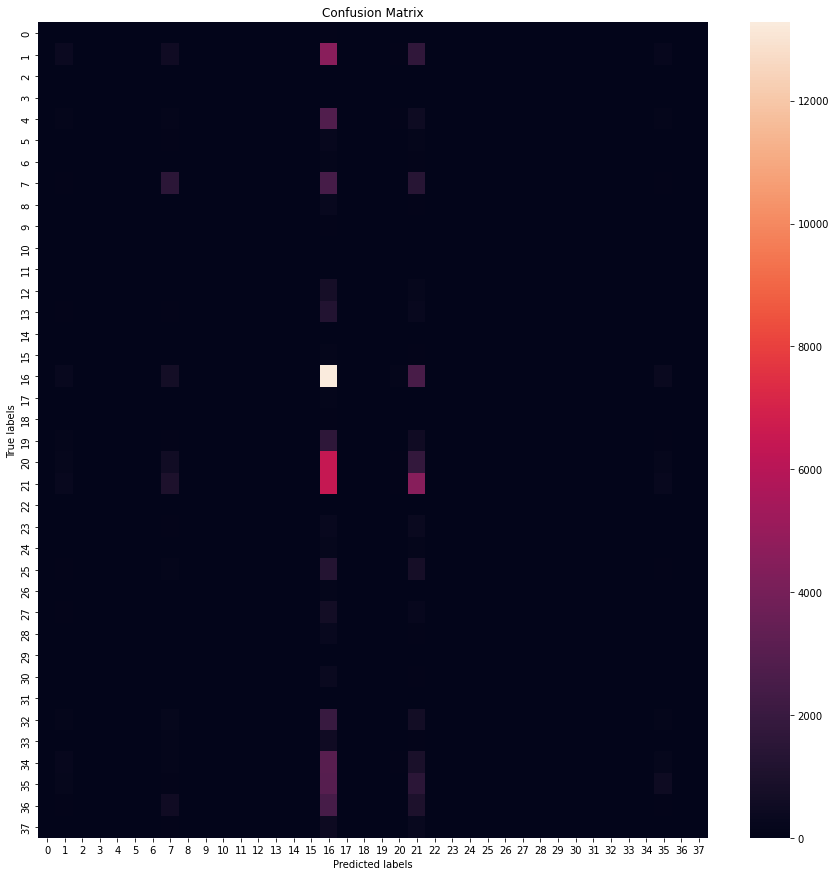

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_test_LR)
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(cm, annot=False, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 